# Анализ новостных сообщений

Рассмотрим коллекцию новостных сообщений за первую половину 2017 года. Про каждое новостное сообщение известны:
* его заголовок и текст
* дата его публикации
* событие, о котором это новостное сообщение написано 
* его рубрика 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline

df = pd.read_csv('../data/news.csv')
df.head()

text        date  \
0   В ПЕТЕРБУРГЕ ПРОШЕЛ МИТИНГ ПРОТИВ ПЕРЕДАЧИ ИС...  2017-01-10   
1   Lenta.co, Москва, 14 января 2017 СИТУАЦИЯ С П...  2017-01-10   
2   Аргументы и Факты (aif.ru), Москва, 14 января...  2017-01-10   
3   Google Новости ТОП, Москва, 14 января 2017 АК...  2017-01-10   
4   Газета.Ru, Москва, 13 января 2017 В МОСКОВСКО...  2017-01-10   

                                event                   class  
0  Передача РПЦ Исаакиевского собора   Внутренняя политика РФ  
1  Передача РПЦ Исаакиевского собора   Внутренняя политика РФ  
2  Передача РПЦ Исаакиевского собора   Внутренняя политика РФ  
3  Передача РПЦ Исаакиевского собора   Внутренняя политика РФ  
4  Передача РПЦ Исаакиевского собора   Внутренняя политика РФ

## Токенизация

Используем регулярные выражения, чтобы разбить тексты на слова

In [2]:
import re
regex = re.compile("[А-Яа-я]+")

def words_only(text, regex=regex):
    return " ".join(regex.findall(text))


df.text = df.text.str.lower()
df.text = df.text.apply(words_only)

Результат:

In [3]:
df.text.iloc[0]

'в петербурге прошел митинг против передачи исаакиевского собора рпц в санкт петербурге люди устроили акцию протеста против передачи исаакиевского собора в безвозмездное пользование рпц жители петербурга собрались на исаакиевской площади чтобы высказаться против передачи исаакиевского собора в безвозмездное пользование рпц передает тасс акция проходит в формате встречи с депутатами законодательного собрания города и не требует согласования с властями участники акции не используют какую либо символику и плакаты а также мегафоны или средства звукоусиления по словам депутата алексея ковалева на исаакиевскую площадь пришло примерно тысяча человек перед участниками протеста выступили депутаты местного парламента борис вишневский и максим резник которые заявили о том что потребуют отмены решения смольного вишневский сообщил что акция будет проходить в виде встречи депутатов с избирателями закон санкт петербурга предоставляет нам право встречаться с избирателями такую встречу мы и проведем ра

### Самые частые слова

In [4]:
from nltk import FreqDist
n_types = []
n_tokens = []
tokens = []
fd = FreqDist()
for index, row in df.iterrows():
    tokens = row['text'].split()
    fd.update(tokens)
    n_types.append(len(fd))
    n_tokens.append(sum(fd.values()))
for i in fd.most_common(10):
    print(i)

('в', 43571)
('и', 25182)
('на', 19120)
('что', 13617)
('не', 11953)
('с', 10868)
('по', 9080)
('о', 5035)
('это', 4955)
('он', 4761)


## Обработка текстов



### Удаление стоп-слов

In [5]:
from nltk.corpus import stopwords
mystopwords = stopwords.words('russian') + ['это', 'наш' , 'тыс', 'млн', 'млрд', 'также',  'т', 'д', '-', '-']

print(mystopwords)
def  remove_stopwords(text, mystopwords = mystopwords):
    try:
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        return ""
df.text = df.text.apply(remove_stopwords)   

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

### Лемматизация

In [6]:
%%time 
from pymystem3 import Mystem

m = Mystem()
def lemmatize(text, mystem=m):
    try:
        return "".join(m.lemmatize(text)).strip()  
    except:
        return " "

df.text = df.text.apply(lemmatize)

CPU times: user 5.38 s, sys: 264 ms, total: 5.65 s
Wall time: 36.2 s


### Удаление стоп-лемм

In [7]:
mystoplemmas = ['который','прошлый','сей', 'свой', 'наш', 'мочь']
def  remove_stoplemmas(text, mystoplemmas = mystoplemmas):
    try:
        return " ".join([token for token in text.split() if not token in mystoplemmas])
    except:
        return ""

df.text = df.text.apply(remove_stoplemmas)  

Самые частые леммы:

In [8]:
lemmata = []
for index, row in df.iterrows():
    lemmata += row['text'].split()
fd = FreqDist(lemmata)
for i in fd.most_common(10):
    print(i)

('россия', 5643)
('год', 4750)
('москва', 4632)
('человек', 4556)
('путин', 4357)
('президент', 4109)
('выборы', 2849)
('вопрос', 2672)
('российский', 2312)
('время', 2261)


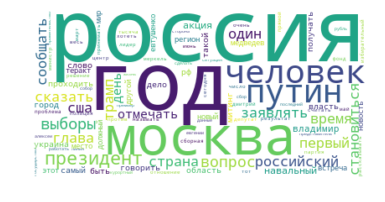

In [9]:
from wordcloud import *
word_freq = [i for i in fd.most_common(100)]
wd = WordCloud(background_color = 'white')
wd.generate_from_frequencies(dict(word_freq))
plt.figure()
plt.imshow(wd, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## Извлечение ключевых словосочетаний


Ключевые слова и словосочетания сложно определить формально. Поскольку определений ключевых слов и словосочетаний множество, существует масса методов их извлечения:
* с учителем VS без учителя
* частотные VS по-сложнее
* из одного текста VS из коллекции текстов
* слова (униграммы) VS биграммы VS $N$-граммы
* термины VS именованные сущности VS коллокации
* последовательные слова VS с использованием окна

### Основные этапы извлечения ключевых слов и словосочетаний:
1. Порождение кандидатов
2. Оценка свойст кандидатов
3. Выбор лучших кандидатов

### Основные этапы извлечения ключевых слов и словосочетаний:
* Морфологические шаблоны
* Меры ассоциации биграмм: PMI, T-Score, LLR
* Графовые методы: TextRank [Mihalcea, Tarau, 2004]
* RAKE [Rose et al., 2010]
* Синтаксические шаблоны

### Морфологические шаблоны

Можно использовать Томита-парсер. Вообще говоря, (далее цитата) Томита-парсер создан для извлечения структурированных данных из текста на естественном языке. Вычленение фактов происходит при помощи контекстно-свободных грамматик и словарей ключевых слов. Парсер позволяет писать свои грамматики и добавлять словари для нужного языка. 

Простейший шаблон ПРИЛ + СУЩ

```
S -> Adj<gnc-agr[1]> Noun<rt,gnc-agr[1]>; 
```

![рисунок](img/tomita1.png)

[ссылка](https://tech.yandex.ru/tomita/)

Переезжаем из DataFrame в списки:

In [10]:
tokens_by_topic = []
for event in df.event.unique():
    tokens = []
    sample = df[df.event==event]
    for i in range(len(sample)):
        tokens += sample.text.iloc[i].split()
    tokens_by_topic.append(tokens)

Выберем событие, из текстов про которое будем извлекать ключевые слова:

In [11]:
event_id = 3

### Использование мер связности 


$w_1, w_2$ -- два слова

$f(w_1), f(w_2)$ -- их частоты

$f(w_1, w_2)$ -- совместная частота биграммы $w_1 w_2$

$N$ -- число слов

$PMI(w_1, w_2) = \log \frac{f(w_1, w_2)}{f(w_1)f(w_2)}$

$T-score(w_1, w_2) = \frac{f(w_1,w_2)-f(w_1)*f(w_2)}{f(w_1,w_2)/N}$

Другие меры связности: $\chi^2$, $\texttt{log likelihood}$

Извлекаем биграммы по разным мерам связности:

In [12]:
%%time 
import nltk
from nltk.collocations import *
N_best = 100 # число извлекаемых биграм

bigram_measures = nltk.collocations.BigramAssocMeasures() # класс для мер ассоциации биграм
finder = BigramCollocationFinder.from_words(tokens_by_topic[event_id]) # класс для хранения и извлечения биграм
finder.apply_freq_filter(10) # избавимся от биграм, которые встречаются реже  десяти раз
raw_freq_ranking = [' '.join(i) for i in finder.nbest(bigram_measures.raw_freq, N_best)] # выбираем топ-10 биграм по частоте 
tscore_ranking = [' '.join(i) for i in finder.nbest(bigram_measures.student_t, N_best)] # выбираем топ-100 биграм по каждой мере 
pmi_ranking =  [' '.join(i) for i in finder.nbest(bigram_measures.pmi, N_best)]
llr_ranking = [' '. join(i) for i in finder.nbest(bigram_measures.likelihood_ratio, N_best)]
chi2_ranking =  [' '.join(i) for i in finder.nbest(bigram_measures.chi_sq, N_best)]

CPU times: user 123 ms, sys: 5.87 ms, total: 129 ms
Wall time: 127 ms


In [13]:
rankings = pd.DataFrame({ 'chi2': chi2_ranking, 'llr':llr_ranking, 't-score' : tscore_ranking, 'pmi': pmi_ranking, 'raw_freq':raw_freq_ranking})
rankings = rankings[['raw_freq', 'pmi', 't-score', 'chi2', 'llr']]
rankings.head(10)

raw_freq                         pmi            t-score  \
0   дмитрий медведев               почтовый ящик   дмитрий медведев   
1    премьер министр                    грин ярд    премьер министр   
2           фонд дар      проектный документация           фонд дар   
3     миллиард рубль              красный поляна     миллиард рубль   
4       илья елисеев                 юрфак лгать       илья елисеев   
5  алексей навальный  инвестиционный содружество  алексей навальный   
6  расследование фбк            бесполетный зона   борьба коррупция   
7   борьба коррупция          автомобильный лифт  расследование фбк   
8      цертум инвест              править партия      цертум инвест   
9        фонд борьба       культурный инициатива        фонд борьба   

                         chi2               llr  
0                    грин ярд   премьер министр  
1  инвестиционный содружество  дмитрий медведев  
2              красный поляна          фонд дар  
3               почтовый ящик      илья елисеев  
4           рублево успенский    миллиард рубль  
5             ярко выраженный     цертум инвест  
6             квадратный метр  борьба коррупция  
7             пресс секретарь   скалистый берег  
8          кушелев безбородко   квадратный метр  
9          краснодарский край   доверенный лицо

Похожи ли списки биграм?

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


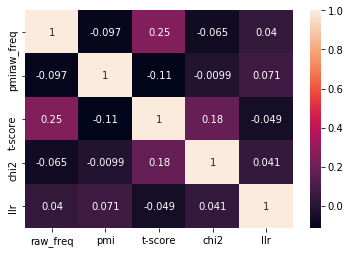

In [14]:
from scipy.stats import spearmanr
import seaborn as sns
%matplotlib inline
corr = spearmanr(rankings).correlation
sns.heatmap(corr, annot=True, xticklabels = list(rankings), yticklabels = list(rankings))

In [15]:
word_filter = lambda w1, w2: "россия" not in (w1, w2)

N_best = 10 # число извлекаемых биграм

bigram_measures = nltk.collocations.BigramAssocMeasures() # класс для мер ассоциации биграм
finder = BigramCollocationFinder.from_words(tokens_by_topic[event_id]) # класс для хранения и извлечения биграм
finder.apply_ngram_filter(word_filter) 
raw_freq_ranking = [' '.join(i) for i in finder.nbest(bigram_measures.raw_freq, N_best)] # выбираем топ-10 биграм по частоте 
tscore_ranking = [' '.join(i) for i in finder.nbest(bigram_measures.student_t, N_best)] # выбираем топ-100 биграм по каждой мере 
pmi_ranking =  [' '.join(i) for i in finder.nbest(bigram_measures.pmi, N_best)]
llr_ranking = [' '. join(i) for i in finder.nbest(bigram_measures.likelihood_ratio, N_best)]
chi2_ranking =  [' '.join(i) for i in finder.nbest(bigram_measures.chi_sq, N_best)]

rankings = pd.DataFrame({ 'chi2': chi2_ranking, 'llr':llr_ranking, 't-score' : tscore_ranking, 'pmi': pmi_ranking, 'raw_freq':raw_freq_ranking})
rankings = rankings[['raw_freq', 'pmi', 't-score', 'chi2', 'llr']]
rankings.head(10)

raw_freq                     pmi             t-score  \
0       россия рубеж  россия внешэкономсвязь        россия рубеж   
1      единый россия       россия заботиться       единый россия   
2  винодельня россия         россия обрекать   винодельня россия   
3     министр россия        россия привыкать    президент россия   
4   президент россия           россия пустой      министр россия   
5     россия дмитрий           россия символ      россия дмитрий   
6     россия граница    россия соответвовать      россия граница   
7     россия владеть       россия сподвижник      россия владеть   
8        весь россия              россия увы         весь россия   
9     россия главный            россия рубеж  современный россия   

                     chi2                 llr  
0            россия рубеж        россия рубеж  
1           единый россия       единый россия  
2          россия граница   винодельня россия  
3       винодельня россия      россия граница  
4     россия подчеркивать    президент россия  
5      современный россия      министр россия  
6        строитель россия      россия дмитрий  
7  россия внешэкономсвязь  современный россия  
8       россия заботиться      россия владеть  
9         россия обрекать         весь россия

### TextRank

* Вершины графа: слова
* Ребра графа могут определяться по следующим правилам:
    * Последовательные слова
    * Слова внутри левого или правого окна в $\pm$ 2-5 слов  

* Ребра могут быть взвешенные или невзвешенные, направленные или ненаправленные
* Любая мера центральности графа используется для определения важности вершин в графе. Слова, соответствующие наиболее важным вершинам, считаются ключевыми. 
* Если две соседние вершины оказываются важными, соответствующие им слова формируют ключевое словосочетание.

PageRank: $PR(V_i)=(1-d)+d \times \sum_{V_j \in In(V_i)} \frac{PR(V_j)}{|Out(V_j)|}$

In [16]:
%%time
from gensim.summarization import keywords
text = ' '.join(tokens_by_topic[event_id])
kw = keywords(text)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


CPU times: user 42.3 s, sys: 10 s, total: 52.3 s
Wall time: 55.2 s


Результаты:

In [17]:
rankings = pd.DataFrame({'Text Rank': kw.split('\n')})
rankings.head(10)

Text Rank
0   дмитрии медведев фото александр
1                навальныи собирать
2  описание проходить расследование
3                             такои
4                       самыи схема
5            премьер министр россия
6                              этот
7                              яхта
8                    второи человек
9                           усадьба

### RAKE

* Кандидаты-фразы – все слова между разделителями – стоп-словами и знаками пунктуации
* Оценка кадидата-фразы $p$: $\frac{deg(p)}{freq(p)}$
* Ограничения по частоте и количеству слов в кандидате-фразе

Для RAKE нужны сырые тексты со стоп-словами.

In [61]:
raw_df = pd.read_csv('../data/news.csv')
raw_df.text = raw_df.text.str.lower()
raw_df.text = raw_df.text.apply(words_only)
raw_df.text = raw_df.text.apply(lemmatize)

In [62]:
text = ' '.join(raw_df[raw_df.event == raw_df.event.unique()[3]].text.tolist())

In [63]:
import RAKE

Rake = RAKE.Rake('../data/stopwords.txt')
kp = [i[0] for i in Rake.run(text) if len(i[0].split())<3 and len(i[0].split())>1 and i[1]>1 and i[0] != '- -']
rankings = pd.DataFrame({'RAKE': kp})
rankings.head(10)

RAKE
0                      цертум-инвест цертум-инвест
1  коррумпированный-коррумпировать премьер-министр
2                                      кто-то фонд
3                         интернет-магазин история
4                         нынешний премьер-министр
5                           где-то останавливаться
6                          интерес премьер-министр
7                          личный интернет-покупка
8                         премьер-министр выбирать
9                          интернет-покупка делать

## Мера контрастности $tf-idf$


Частота терма [Luhn, 1957]:  Важность терма в тексте пропорциональная его частоте.
Обратная документная частота [Spaerck Jones, 1972]: Специфичность терма в тексте обратно пропорциональна числу текстов, в которых терм встречается. 

$tfidf(term, text, collection) = tf(term, document) \times idf(term, collection)$

Самая популярная комбинация весов}: $f_{t,d} \times \log \frac{|D|}{n_t+1}$

Извлекаем ключевые слова по $tf-idf$:

In [19]:
%%time 
from nltk.text import TextCollection 
tfidf_values = [] 
tfidf_ranking = []
corpus = TextCollection(tokens_by_topic) # класс для вычисления tf-idf
for i in set(tokens_by_topic[event_id]): # цикл по всем уникальным токенам в этом разделе
    tfidf_values.append([i, corpus.tf_idf(i, tokens_by_topic[event_id])]) # вычисляем tf-idf
for i in sorted(tfidf_values,key=lambda l:l[1], reverse=True)[:N_best]: # выбираем топ-100 по tf-idf
    tfidf_ranking.append(i[0])

CPU times: user 39.4 s, sys: 249 ms, total: 39.6 s
Wall time: 40.4 s


In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np


tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 0)
tfidf_matrix =  tfidf.fit_transform([' '.join(tokens) for tokens in tokens_by_topic])
feature_names = tfidf.get_feature_names() 
tfidf_ranking = []
dense = tfidf_matrix.todense()

text = dense[event_id].tolist()[0]
phrase_scores = [pair for pair in zip(range(0, len(text)), text) if pair[1] > 0]
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
phrases = []
for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:40]:
    tfidf_ranking.append(phrase)



In [63]:
rankings = pd.DataFrame({'tf-idf': tfidf_ranking})
rankings.head(10)

tf-idf
0       медведев
1           фонд
2            фбк
3            дар
4  расследование
5           яхта
6        елисеев
7        усадьба
8    виноградник
9      навальный

### Задание 2

Измените ngram_range так, чтобы tf-idf веса вычислялись для пар слов. 

### Демо Natasha

Natasha - библиотека для поиска и извлечения именованных сущностей (Named-entity recognition) из текстов на русском языке. На данный момент разбираются упоминания персон, даты и суммы денег.

In [33]:
from natasha import *


text = 'Экс-президента Франции Николя Саркози задержали по делу о финансировании его избирательной кампании 2007 года, \
передает французская газета Monde. Сейчас, по данным издания, политик находится в помещениях судебной полиции в Нантере. \
Бывший президент Франции пробудет под стражей минимум 48 часов. \
Весной 2012 года французское издание Mediapart опубликовало документы, в которых говорилось о передаче ливийским режимом \
50 млн евро на нужды президентской кампании Саркози. Судебные разбирательства по этому делу продолжаются во Франции до сих пор.'



extractors = [NamesExtractor(), PersonExtractor(), DatesExtractor(), LocationExtractor(), OrganisationExtractor(), MoneyExtractor()]
for extractor in extractors:
    matches = extractor(text)
    for match in matches:
        print(match.span, match.fact)
    

[23, 37) Name(first='николя', middle=None, last='саркози', nick=None)
[461, 468) Name(first=None, middle=None, last='саркози', nick=None)
[0, 37) Person(position='Экс-президента Франции', name=Name(first='николя', middle=None, last='саркози', nick=None))
[239, 256) Person(position='президент', name=Name(first=None, middle=None, last='франция', nick=None))
[461, 468) Person(position=None, name=Name(first=None, middle=None, last='саркози', nick=None))
[100, 109) Date(year=2007, month=None, day=None)
[303, 312) Date(year=2012, month=None, day=None)
[15, 22) Location(name='франция')
[77, 99) Location(name='избирательная кампания')
[249, 256) Location(name='франция')
[438, 460) Location(name='президентская кампания')
[525, 532) Location(name='франция')
[120, 138) Organisation(name='французская газета')
[417, 428) Money(integer=50, fraction=None, multiplier=1000000, currency='EUR', coins=None)


# Векторная модель 

|           | $d_1$      | $d_2$      | $\ldots$ | $d_{D}$    |
|-----------|------------|------------|----------|--------------|
| $w_1$     | $f_{11}$   | $f_{12}$   |          | $f_{1D}$   |
| $w_2$     | $f_{21}$   | $f_{22}$   |          | $f_{2D}$   |
| $\ldots$  |            |            |          |              |
| $w_{|V|}$ | $f_{V1}$ | $f_{V2}$ |          | $f_{VD}$ |


Косинусная мера близости в векторной модели [Salton et. al, 1975]: 
$ \cos(d_i, d_j) = \frac {d_i \times d_j}{||d_i||||d_j||} = \frac{\sum_k f_{ki} \times f_{kj}} {\sqrt{(\sum_k f_{ki})^2} \sqrt{(\sum_k f_{kj})^2}}$


Если вектора нормированы на длину $||d_i|| = ||d_j|| = 1$, $ \cos(d_i, d_j) = d_i \times d_j$

## Вычисление сходства и Gensim

Представление данных в Gensim словарем и корпусом:

In [64]:
from gensim.corpora import *
texts = [df.text.iloc[i].split() for i in range(len(df))]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

Using TensorFlow backend.


In [66]:
print(dictionary)

Dictionary(22701 unique tokens: ['петербург', 'проходить', 'митинг', 'против', 'передача']...)


In [68]:
print(corpus[0])

[(0, 6), (1, 3), (2, 1), (3, 3), (4, 5), (5, 6), (6, 8), (7, 3), (8, 2), (9, 3), (10, 1), (11, 5), (12, 3), (13, 3), (14, 3), (15, 1), (16, 1), (17, 2), (18, 1), (19, 2), (20, 1), (21, 1), (22, 3), (23, 4), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 2), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 2), (45, 1), (46, 1), (47, 1), (48, 1), (49, 2), (50, 1), (51, 1), (52, 1), (53, 1), (54, 2), (55, 2), (56, 1), (57, 1), (58, 1), (59, 2), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 2), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110, 1),

Вычисление сходства по косинусной мере на векторах $tf-idf$:

In [49]:
%%time
from gensim.models import  *
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

CPU times: user 106 ms, sys: 2.8 ms, total: 109 ms
Wall time: 109 ms


In [54]:
from gensim import similarities

index = similarities.MatrixSimilarity(tfidf[corpus])
sims = index[corpus_tfidf]

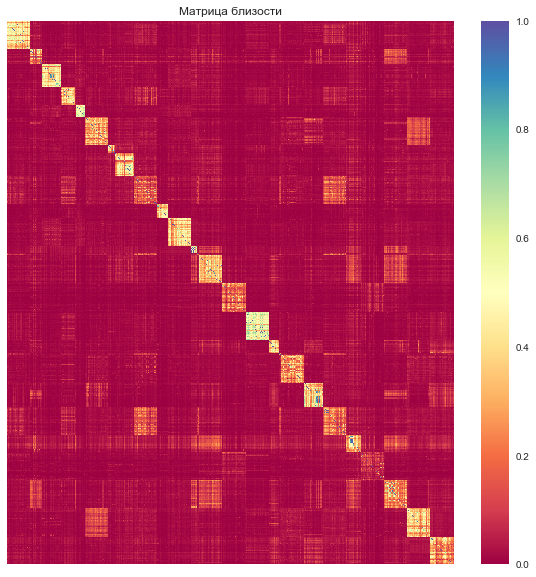

In [55]:
from pylab import pcolor, show, colorbar, xticks, yticks
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (10,10))


sns.heatmap(data=sims, cmap = 'Spectral').set(xticklabels=[],yticklabels=[])

plt.title("Матрица близости")
plt.show()

## Модели скрытых тем

### Латентно-семантический анализ

Сингулярное разложение: $M = U \Sigma V^T$

Снижение размерности с помощью сингулярного разложения: $M'_k = U \Sigma_k V^t_k$


![рисунок](img/svd.jpg)


![рисунок](img/word2topic2doc.png)

In [50]:
%%time
lsi = lsimodel.LsiModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=50)

CPU times: user 2.52 s, sys: 184 ms, total: 2.71 s
Wall time: 2.2 s


In [51]:
lsi.show_topics(5)

[(0,
  '0.224*"путин" + 0.164*"трамп" + 0.148*"меркель" + 0.134*"президент" + 0.127*"выборы" + 0.118*"курортный" + 0.113*"навальный" + 0.112*"акция" + 0.110*"теракт" + 0.105*"сбор"'),
 (1,
  '-0.550*"курортный" + -0.467*"сбор" + -0.235*"законопроект" + -0.212*"эксперимент" + -0.159*"инфраструктура" + -0.148*"введение" + -0.129*"вносить" + -0.119*"крым" + -0.119*"край" + -0.112*"алтайский"'),
 (2,
  '0.355*"собор" + 0.266*"исаакиевский" + -0.247*"путин" + -0.233*"меркель" + 0.205*"передача" + 0.203*"акция" + 0.203*"рпц" + -0.170*"трамп" + 0.149*"навальный" + 0.134*"митинг"'),
 (3,
  '-0.316*"теракт" + 0.314*"собор" + -0.244*"барселона" + 0.235*"исаакиевский" + 0.182*"передача" + 0.178*"рпц" + -0.168*"лондон" + 0.139*"путин" + 0.138*"меркель" + -0.132*"чуркин"'),
 (4,
  '-0.464*"евтушенко" + -0.365*"чуркин" + -0.292*"поэт" + -0.233*"евгений" + -0.175*"виталий" + 0.163*"партия" + -0.159*"умирать" + -0.147*"оон" + 0.130*"теракт" + 0.121*"великобритания"')]

Как снижение размерности влияет на матрицу близости:

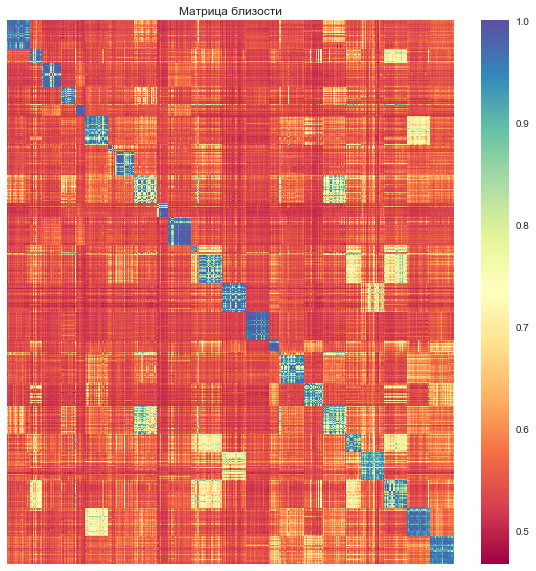

In [56]:
corpus_lsi = lsi[corpus]
index = similarities.MatrixSimilarity(lsi[corpus])
sims = index[corpus_lsi]
sims  = (sims + 1)/2.
plt.figure(figsize = (10,10))
sns.heatmap(data=sims, cmap = 'Spectral').set(xticklabels=[], yticklabels=[])
plt.title("Матрица близости")
plt.show()

### Главные компоненты

In [57]:
X = [0] * len(df)
Y = [0] * len(df)
for i in range(len(df)):
    vec = corpus[i]
    LSI_topics = (lsi[vec])
    try:
        for topic in LSI_topics:
            if topic[0] == 0:
                X[i] = topic[1]
            elif topic[0] == 1:
                Y[i] = topic[1]
    except:
        pass
vis_df = pd.DataFrame({'X': X, 'Y': Y, 'topic' : df.event})

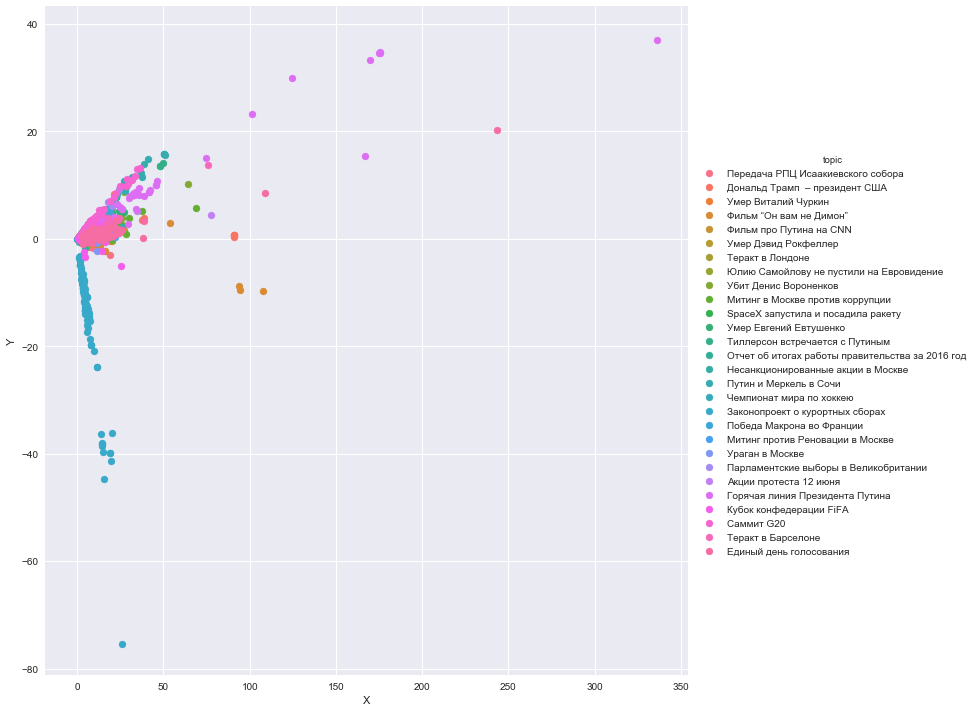

In [58]:
sns.FacetGrid(vis_df, hue="topic", size = 10).map(plt.scatter, "X", "Y").add_legend()

### Латентное размещение Дирихле

Генеративная модель порождения документа, оценивает распределение тем по документам и слов по темам.

In [52]:
%%time
lda = ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=20,
                        alpha='auto', eta='auto', iterations = 20, passes = 10)

CPU times: user 3min 7s, sys: 579 ms, total: 3min 8s
Wall time: 3min 8s


In [53]:
lda.show_topics(5)

[(18,
  '0.011*"макрон" + 0.007*"франция" + 0.006*"тур" + 0.005*"ле" + 0.005*"пена" + 0.005*"победа" + 0.004*"первый" + 0.004*"выборы" + 0.004*"результат" + 0.004*"второй"'),
 (2,
  '0.019*"ракета" + 0.019*"запуск" + 0.016*"ступень" + 0.015*"компания" + 0.014*"первый" + 0.011*"повторный" + 0.010*"март" + 0.008*"спутник" + 0.007*"ракета-носитель" + 0.006*"орбита"'),
 (14,
  '0.020*"акция" + 0.020*"навальный" + 0.018*"митинг" + 0.016*"человек" + 0.014*"москва" + 0.009*"задерживать" + 0.009*"протест" + 0.008*"власть" + 0.007*"суд" + 0.007*"полиция"'),
 (5,
  '0.029*"москва" + 0.021*"человек" + 0.019*"ураган" + 0.009*"май" + 0.008*"погибший" + 0.008*"пострадать" + 0.008*"погибать" + 0.008*"столица" + 0.007*"сообщать" + 0.006*"тысяча"'),
 (1,
  '0.031*"путин" + 0.020*"президент" + 0.015*"россия" + 0.011*"вопрос" + 0.010*"меркель" + 0.008*"сша" + 0.008*"трамп" + 0.008*"встреча" + 0.008*"владимир" + 0.008*"российский"')]

In [69]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis
vis_data = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis_data)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-12-01 17:36:52.333998. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [70]:
import plotly.offline as py
import plotly.graph_objs as go

py.init_notebook_mode()

def plot_difference(mdiff, title="", annotation=None):
    """
    Helper function for plot difference between models
    """
    annotation_html = None
    if annotation is not None:
        annotation_html = [
            [
                "+++ {}<br>--- {}".format(", ".join(int_tokens), ", ".join(diff_tokens)) 
                for (int_tokens, diff_tokens) in row
            ] 
            for row in annotation
        ]
        
    data = go.Heatmap(z=mdiff, colorscale='RdBu', text=annotation_html)
    layout = go.Layout(width=500, height=500, title=title, xaxis=dict(title="topic"), yaxis=dict(title="topic"))
    py.iplot(dict(data=[data], layout=layout))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/json/encoder.py:199: DeprecationWarning:

Interpreting naive datetime as local 2017-12-01 17:37:48.821297. Please add timezone info to timestamps.



In [71]:
mdiff, annotation = lda.diff(lda, distance='jaccard', num_words=50)
plot_difference(mdiff, title="Topic difference (one model) [jaccard distance]", annotation=annotation)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/json/encoder.py:199: DeprecationWarning:

Interpreting naive datetime as local 2017-12-01 17:38:04.726594. Please add timezone info to timestamps.



### TSNE

In [59]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import *

vectors = TfidfVectorizer().fit_transform(df.text)
X_reduced = TruncatedSVD(n_components=5, random_state=0).fit_transform(vectors)
X_embedded = TSNE(n_components=2, perplexity=5, verbose=0).fit_transform(X_reduced)

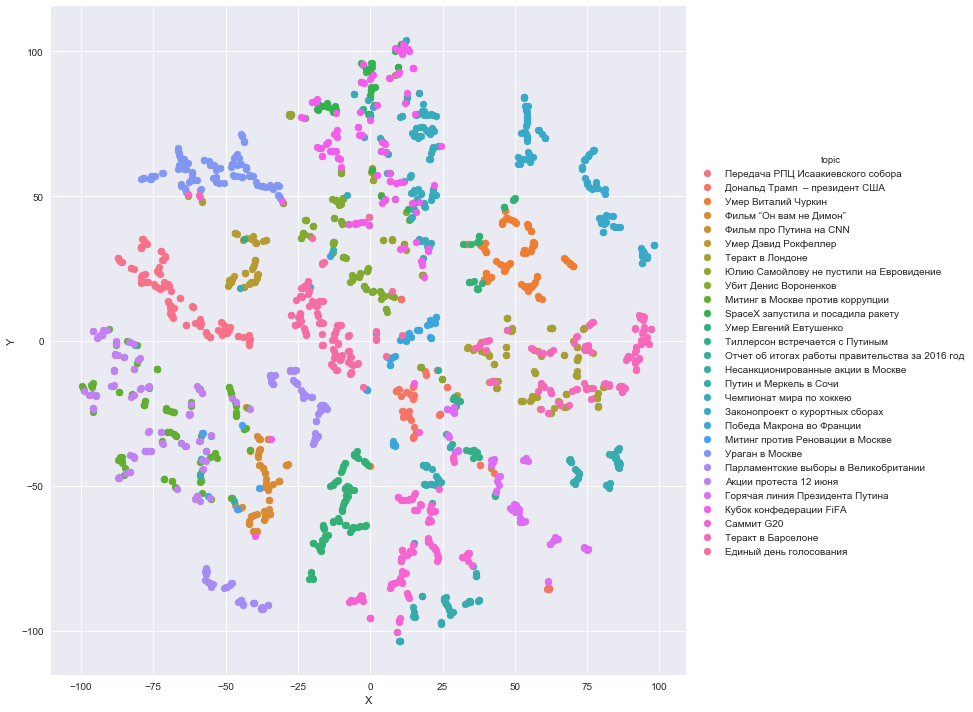

In [60]:
vis_df = pd.DataFrame({'X': X_embedded[:, 0], 'Y': X_embedded[:, 1], 'topic' : df.event})
sns.FacetGrid(vis_df, hue="topic", size=10).map(plt.scatter, "X", "Y").add_legend()